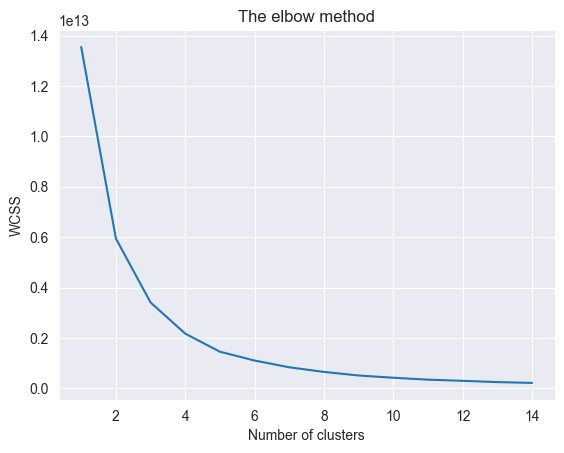

cluster
0    1353
1     581
2      83
Name: count, dtype: int64


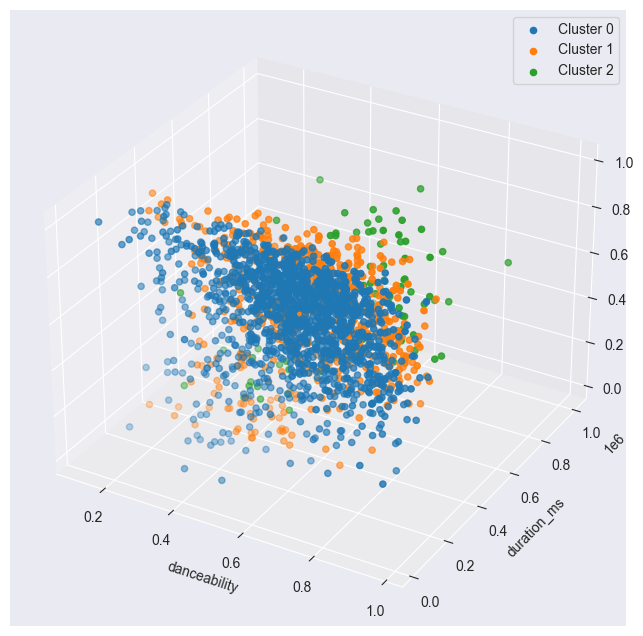

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("darkgrid")

# Membaca data
fd = pd.read_csv('spotify_data.csv')

# Memilih fitur numerik
features = fd.iloc[:, 2:16]
numerical_features = features.select_dtypes(include=[np.number])

# Metode siku (Elbow Method) untuk menentukan jumlah cluster optimal
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(numerical_features)
    wcss.append(kmeans.inertia_)

# Plot metode siku
plt.plot(range(1, 15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

# Memilih jumlah cluster berdasarkan metode siku
optimal_clusters = 3  # Ganti sesuai dengan hasil dari metode siku

# Melakukan pengelompokan menggunakan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
fd['cluster'] = kmeans.fit_predict(numerical_features)

# Menampilkan hasil pengelompokan
print(fd['cluster'].value_counts())

# Visualisasi hasil pengelompokan dalam ruang 3 dimensi
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Pilih tiga fitur pertama untuk visualisasi 3D
x = numerical_features.iloc[:, 0]
y = numerical_features.iloc[:, 1]
z = numerical_features.iloc[:, 2]

# Plot setiap cluster dengan warna yang berbeda
for cluster in range(optimal_clusters):
    cluster_data = fd[fd['cluster'] == cluster]
    ax.scatter(cluster_data.iloc[:, 2], cluster_data.iloc[:, 3], cluster_data.iloc[:, 4], label=f'Cluster {cluster}')

# Tambahkan label sumbu
ax.set_xlabel(numerical_features.columns[0])
ax.set_ylabel(numerical_features.columns[1])
ax.set_zlabel(numerical_features.columns[2])

# Tampilkan legenda
ax.legend()

# Tampilkan plot 3D
plt.show()


In [6]:
from sklearn.preprocessing import LabelEncoder

# Misalkan kolom 'Gender' adalah kolom string yang ingin diubah
le = LabelEncoder()
fd['artist'] = le.fit_transform(fd['artist'])

model = KMeans(n_clusters= 5)
model.fit(fd)

D:\Program\Pythonn\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [7]:
print(model.cluster_centers_)

[[ 1.04118677e+03  1.68501873e-01  6.15379350e-01  2.34970255e+05
   6.89916473e-01  8.49298959e-02  5.34918794e+00  1.89133643e-01
  -6.64398608e+00  6.25290023e-01  8.99537123e-02  1.21843194e+02
   3.97795824e+00  4.86303364e-01  4.54756381e-01  9.86513921e+02
   6.60600928e+02  1.78654292e-01]
 [ 1.06640775e+03  1.96398028e-01  6.20175194e-01  1.80349462e+05
   7.05781705e-01  8.92426804e-02  5.11317829e+00  1.90197674e-01
  -6.45820310e+00  6.43410853e-01  1.01347132e-01  1.23130724e+02
   3.97054264e+00  5.45309767e-01  4.52713178e-01  9.76982946e+02
   6.76482171e+02  2.33146835e-15]
 [ 8.27120968e+02  2.53300797e-01  6.57943548e-01  4.17840073e+05
   5.90810484e-01  4.26390304e-01  5.67741935e+00  1.64004032e-01
  -1.04763065e+01  5.32258065e-01  6.74709677e-02  1.17457419e+02
   3.96774194e+00  4.58454032e-01  7.58064516e-01  9.54725806e+02
   6.65943548e+02  1.45967742e+00]
 [ 8.31961538e+02  3.51931923e-01  5.45038462e-01  6.56582615e+05
   5.96361538e-01  3.90602581e-01  4.